In [1]:
import pandas as pd

In [2]:
retail = pd.read_csv('/content/drive/MyDrive/Korea it 아카데미/data analysis/data/OnlineRetail.csv')

retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [3]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


* InvoiceNo: 주문 번호
* StockCode: 상품 코드
* Description: 상품 설명
* Quantity: 주문 수량
* InvoiceDate: 주문 날짜
* UnitPrice: 상품 가격
* CustomerID: 고객 아이디
* Country: 고객 거주지역(국가)

In [4]:
# 각 컬럼당 null 값의 수

retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
# 각 컬럼당 null 값의 비율

retail.isnull().mean()

InvoiceNo      0.000000
StockCode      0.000000
Description    0.002683
Quantity       0.000000
InvoiceDate    0.000000
UnitPrice      0.000000
CustomerID     0.249267
Country        0.000000
dtype: float64

In [6]:
# 비/탈퇴/휴면회원 제거

retail1 = retail.copy()

retail1 = retail1[pd.notnull(retail1['CustomerID'])]

retail1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [7]:
len(retail1)

406829

In [8]:
retail1.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [9]:
retail1[retail1['Quantity'] <= 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [10]:
# 구입 수량이 1 이상인 데이터만 저장

retail1 = retail1[retail1['Quantity'] >= 1]

len(retail1)

397924

In [11]:
# 구입 가격이 0 이하인 데이터를 확인

retail1[retail1['UnitPrice'] <= 0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,12/5/2010 14:02,0.0,12647.0,Germany
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,12/16/2010 14:36,0.0,16560.0,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,12/21/2010 13:45,0.0,14911.0,EIRE
47068,540372,22090,PAPER BUNTING RETROSPOT,24,1/6/2011 16:41,0.0,13081.0,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,1/6/2011 16:41,0.0,13081.0,United Kingdom


In [12]:
# 구입 가격이 0보다 큰 데이터만 저장

retail1 = retail1[retail1['UnitPrice'] > 0]

len(retail1)

397884

In [13]:
# 고객의 총 지출 비용(CheckoutPrice) 파생 변수 만들기
# 총 지출비용(CheckoutPrice) = 가격(UnitPrice) * 수량(Quantity)

retail1['CheckoutPrice'] = retail1['UnitPrice'] * retail1['Quantity']

retail1[['UnitPrice', 'Quantity', 'CheckoutPrice']]

,UnitPrice,Quantity,CheckoutPrice
0,2.55,6,15.30
1,3.39,6,20.34
2,2.75,8,22.00
3,3.39,6,20.34
4,3.39,6,20.34
...,...,...,...
541904,0.85,12,10.20
541905,2.10,6,12.60
541906,4.15,4,16.60
541907,4.15,4,16.60


In [14]:
retail1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   InvoiceNo      397884 non-null  object 
 1   StockCode      397884 non-null  object 
 2   Description    397884 non-null  object 
 3   Quantity       397884 non-null  int64  
 4   InvoiceDate    397884 non-null  object 
 5   UnitPrice      397884 non-null  float64
 6   CustomerID     397884 non-null  float64
 7   Country        397884 non-null  object 
 8   CheckoutPrice  397884 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 30.4+ MB


In [15]:
retail1['InvoiceDate'] = pd.to_datetime(retail1['InvoiceDate'])

retail1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   InvoiceNo      397884 non-null  object        
 1   StockCode      397884 non-null  object        
 2   Description    397884 non-null  object        
 3   Quantity       397884 non-null  int64         
 4   InvoiceDate    397884 non-null  datetime64[ns]
 5   UnitPrice      397884 non-null  float64       
 6   CustomerID     397884 non-null  float64       
 7   Country        397884 non-null  object        
 8   CheckoutPrice  397884 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.4+ MB


In [22]:
# 전체 매출

total_revenue = retail1['CheckoutPrice'].sum()

total_revenue

8911407.904

In [24]:
# 각 나라별 구매 횟수

retail1['Country'].value_counts()

Country
United Kingdom          354321
Germany                   9040
France                    8341
EIRE                      7236
Spain                     2484
Netherlands               2359
Belgium                   2031
Switzerland               1841
Portugal                  1462
Australia                 1182
Norway                    1071
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     248
Unspecified                244
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         57
Lebanon                     45


In [27]:
# 국가별 매출

rev_by_countries = retail1.groupby('Country')['CheckoutPrice'].sum().sort_values()

rev_by_countries

Country
Saudi Arabia                145.920
Bahrain                     548.400
Czech Republic              826.740
RSA                        1002.310
Brazil                     1143.600
European Community         1300.250
Lithuania                  1661.060
Lebanon                    1693.880
United Arab Emirates       1902.280
Unspecified                2667.070
Malta                      2725.590
USA                        3580.390
Canada                     3666.380
Iceland                    4310.000
Greece                     4760.520
Israel                     7221.690
Poland                     7334.650
Austria                   10198.680
Cyprus                    13590.380
Italy                     17483.240
Denmark                   18955.340
Channel Islands           20450.440
Singapore                 21279.290
Finland                   22546.080
Portugal                  33439.890
Norway                    36165.440
Japan                     37416.370
Sweden              

[Text(0, 0, 'Saudi Arabia'),
 Text(1, 0, 'Bahrain'),
 Text(2, 0, 'Czech Republic'),
 Text(3, 0, 'RSA'),
 Text(4, 0, 'Brazil'),
 Text(5, 0, 'European Community'),
 Text(6, 0, 'Lithuania'),
 Text(7, 0, 'Lebanon'),
 Text(8, 0, 'United Arab Emirates'),
 Text(9, 0, 'Unspecified'),
 Text(10, 0, 'Malta'),
 Text(11, 0, 'USA'),
 Text(12, 0, 'Canada'),
 Text(13, 0, 'Iceland'),
 Text(14, 0, 'Greece'),
 Text(15, 0, 'Israel'),
 Text(16, 0, 'Poland'),
 Text(17, 0, 'Austria'),
 Text(18, 0, 'Cyprus'),
 Text(19, 0, 'Italy'),
 Text(20, 0, 'Denmark'),
 Text(21, 0, 'Channel Islands'),
 Text(22, 0, 'Singapore'),
 Text(23, 0, 'Finland'),
 Text(24, 0, 'Portugal'),
 Text(25, 0, 'Norway'),
 Text(26, 0, 'Japan'),
 Text(27, 0, 'Sweden'),
 Text(28, 0, 'Belgium'),
 Text(29, 0, 'Switzerland'),
 Text(30, 0, 'Spain'),
 Text(31, 0, 'Australia'),
 Text(32, 0, 'France'),
 Text(33, 0, 'Germany'),
 Text(34, 0, 'EIRE'),
 Text(35, 0, 'Netherlands'),
 Text(36, 0, 'United Kingdom')]

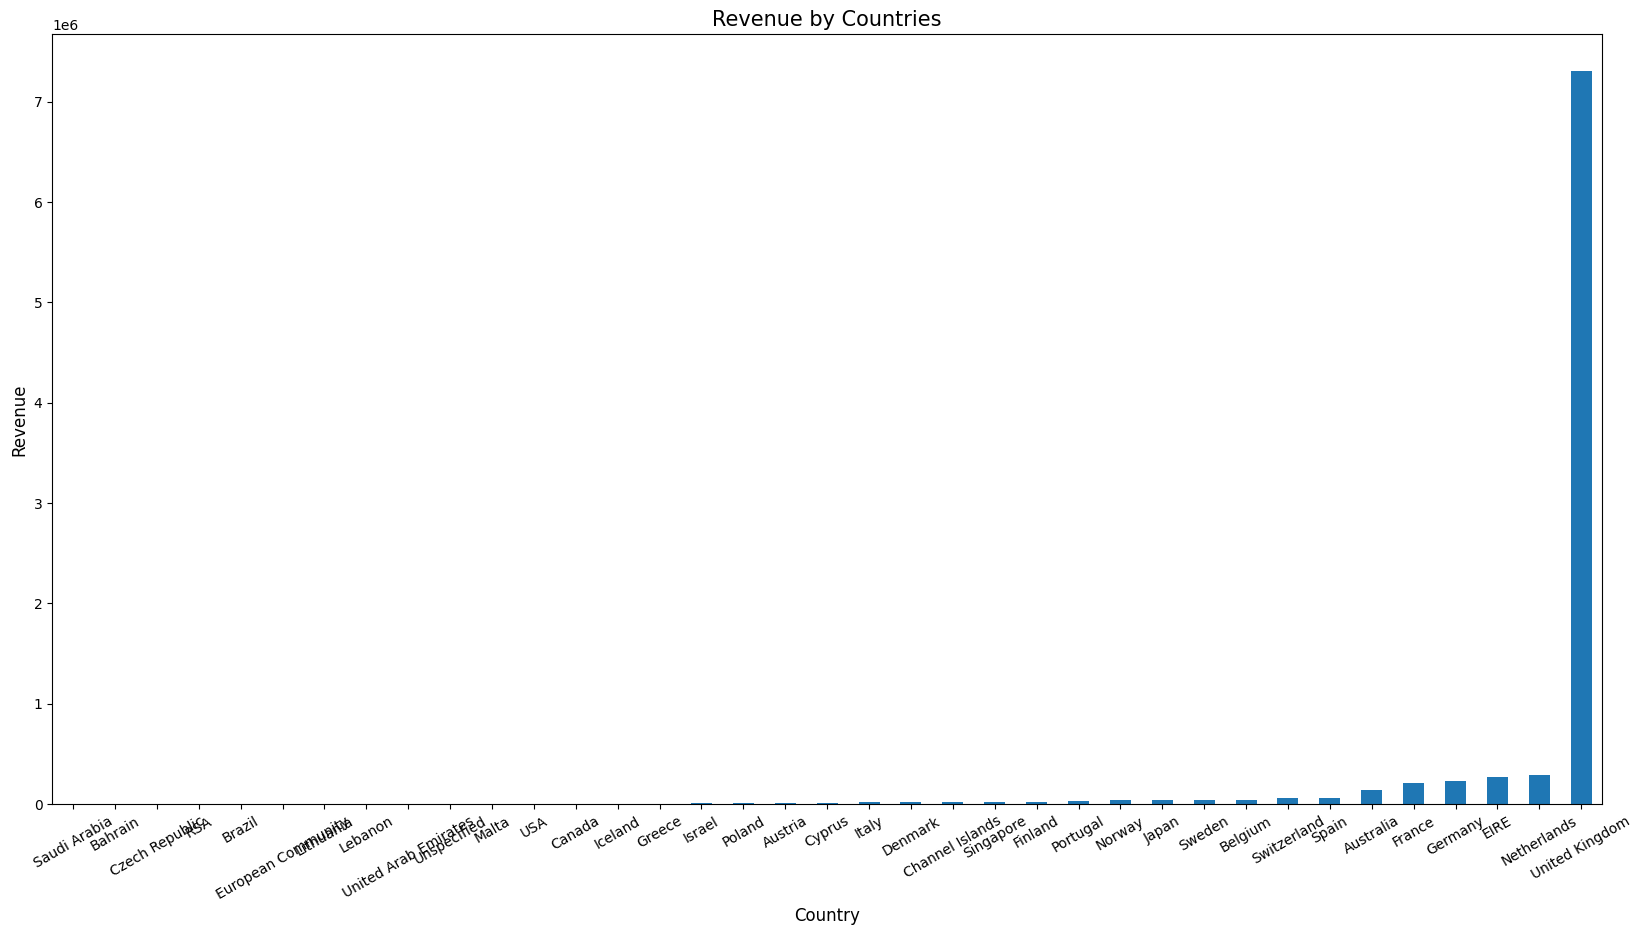

In [31]:
plot = rev_by_countries.plot(kind = 'bar', figsize = (20, 10))
plot.set_xlabel('Country', fontsize = 12)
plot.set_ylabel('Revenue', fontsize = 12)
plot.set_title('Revenue by Countries', fontsize = 15)
plot.set_xticklabels(labels = rev_by_countries.index, rotation = 30)

In [33]:
rev_by_countries/ total_revenue

Country
Saudi Arabia            0.000016
Bahrain                 0.000062
Czech Republic          0.000093
RSA                     0.000112
Brazil                  0.000128
European Community      0.000146
Lithuania               0.000186
Lebanon                 0.000190
United Arab Emirates    0.000213
Unspecified             0.000299
Malta                   0.000306
USA                     0.000402
Canada                  0.000411
Iceland                 0.000484
Greece                  0.000534
Israel                  0.000810
Poland                  0.000823
Austria                 0.001144
Cyprus                  0.001525
Italy                   0.001962
Denmark                 0.002127
Channel Islands         0.002295
Singapore               0.002388
Finland                 0.002530
Portugal                0.003752
Norway                  0.004058
Japan                   0.004199
Sweden                  0.004307
Belgium                 0.004623
Switzerland             0.006334
Sp

In [47]:
# 월별 매출 구하기

retail1['InvoiceDate'].sort_values(ascending = False)

541908   2011-12-09 12:50:00
541901   2011-12-09 12:50:00
541895   2011-12-09 12:50:00
541896   2011-12-09 12:50:00
541897   2011-12-09 12:50:00
                 ...        
3        2010-12-01 08:26:00
1        2010-12-01 08:26:00
5        2010-12-01 08:26:00
6        2010-12-01 08:26:00
0        2010-12-01 08:26:00
Name: InvoiceDate, Length: 397884, dtype: datetime64[ns]

In [53]:
retail1['YearMonth'] = retail1['InvoiceDate'].dt.to_period('M')

retail1['YearMonth']

0         2010-12
1         2010-12
2         2010-12
3         2010-12
4         2010-12
           ...   
541904    2011-12
541905    2011-12
541906    2011-12
541907    2011-12
541908    2011-12
Name: YearMonth, Length: 397884, dtype: period[M]

In [55]:
retail1.groupby('YearMonth')['CheckoutPrice'].sum()

YearMonth
2010-12     572713.890
2011-01     569445.040
2011-02     447137.350
2011-03     595500.760
2011-04     469200.361
2011-05     678594.560
2011-06     661213.690
2011-07     600091.011
2011-08     645343.900
2011-09     952838.382
2011-10    1039318.790
2011-11    1161817.380
2011-12     518192.790
Freq: M, Name: CheckoutPrice, dtype: float64

In [57]:
def extract_month(date) : # 2011-12-09 12:50:00
    month = str(date.month) # 12

    if date.month < 10 :
        month = '0' + month # 09

    return str(date.year) + month # 201112

In [61]:
rev_by_month = retail1.set_index('InvoiceDate').groupby(extract_month)['CheckoutPrice'].sum()

rev_by_month

InvoiceDate
201012     572713.890
201101     569445.040
201102     447137.350
201103     595500.760
201104     469200.361
201105     678594.560
201106     661213.690
201107     600091.011
201108     645343.900
201109     952838.382
201110    1039318.790
201111    1161817.380
201112     518192.790
Name: CheckoutPrice, dtype: float64

In [64]:
def plot_bar(df, xlabel, ylabel, title, figsize = (20, 10), fontsize = 12, titlesize = 15, rotation = 30) :
    plot = df.plot(kind = 'bar', figsize = figsize)
    plot.set_xlabel(xlabel, fontsize = fontsize)
    plot.set_ylabel(ylabel, fontsize = fontsize)
    plot.set_title(title, fontsize = titlesize)
    plot.set_xticklabels(labels = df.index, rotation = rotation)

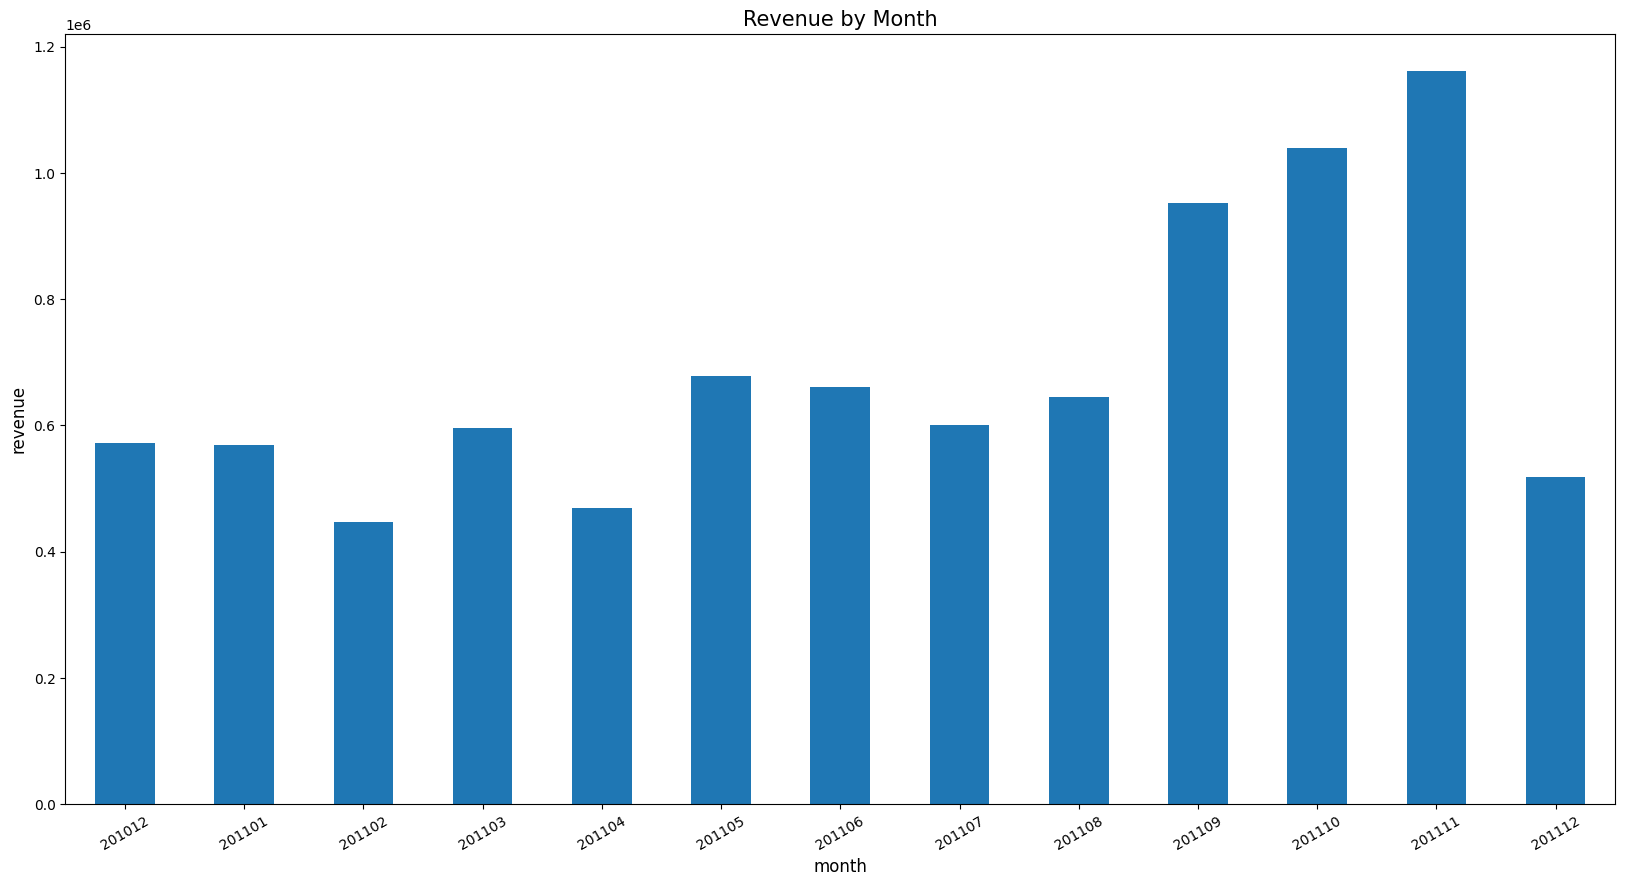

In [65]:
plot_bar(rev_by_month, 'month', 'revenue', 'Revenue by Month')

In [93]:
# 요일별 매출액

rev_by_dow = retail1.set_index('InvoiceDate').groupby(lambda date : date.dayofweek)['CheckoutPrice'].sum()

rev_by_dow

InvoiceDate
0    1367146.411
1    1700634.631
2    1588336.170
3    1976859.070
4    1485917.401
6     792514.221
Name: CheckoutPrice, dtype: float64

In [77]:
import numpy as np

In [78]:
day_of_week = np.array(['Mon', 'Tue', 'Web', 'Thur', 'Fri', 'Sat', 'Sun'])

rev_by_dow.index = day_of_week[rev_by_dow.index]

rev_by_dow

Mon     1367146.411
Tue     1700634.631
Web     1588336.170
Thur    1976859.070
Fri     1485917.401
Sun      792514.221
Name: CheckoutPrice, dtype: float64

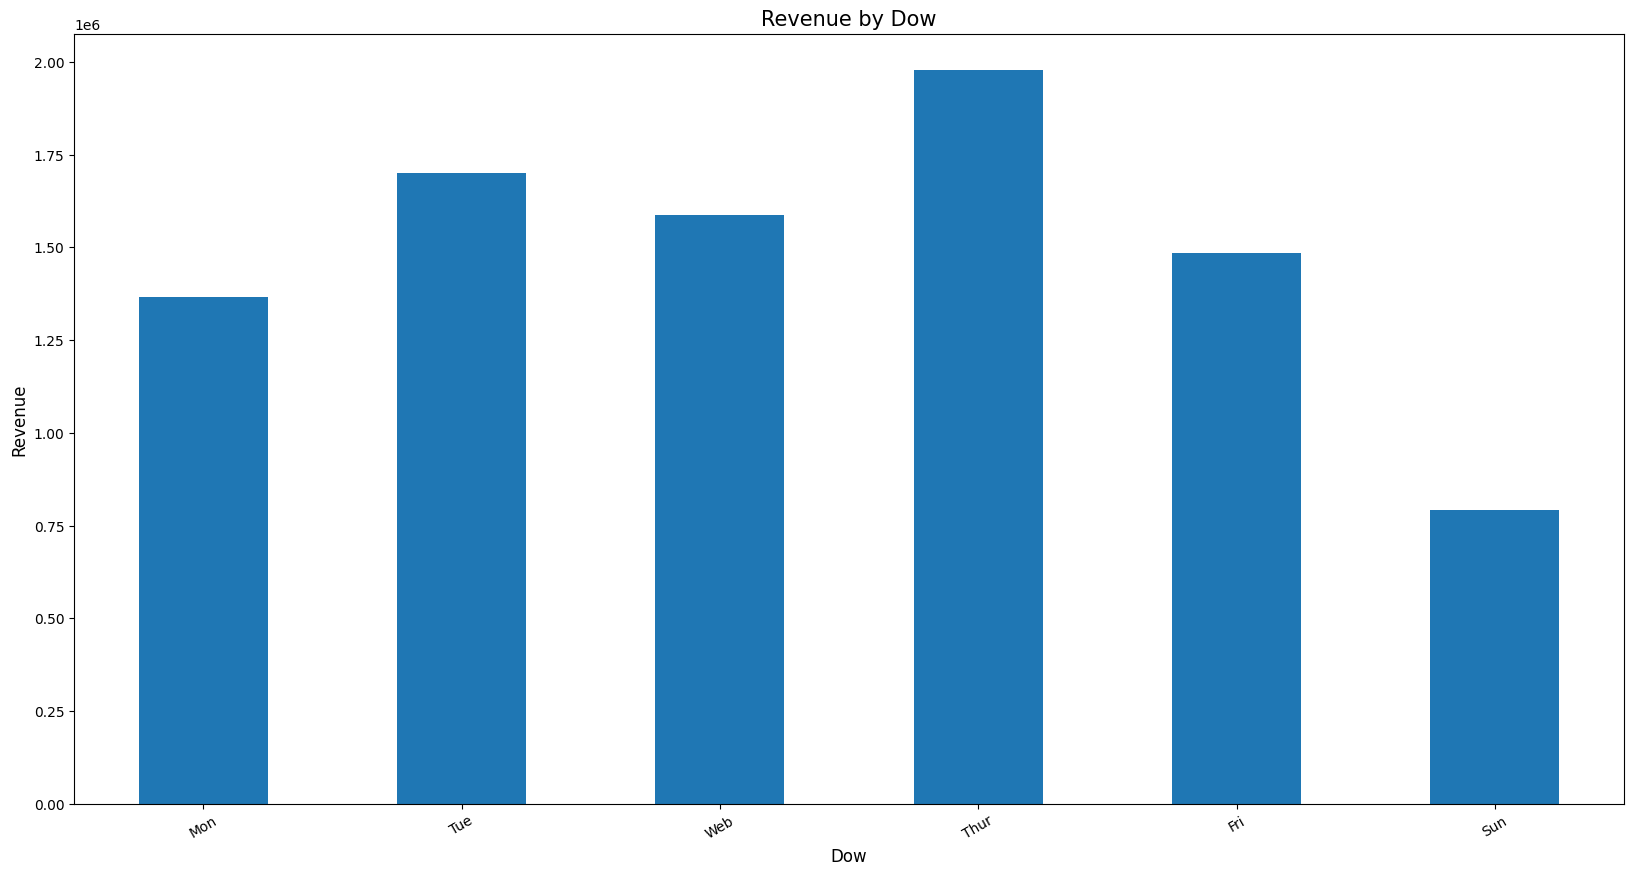

In [81]:
plot_bar(rev_by_dow,'Dow', 'Revenue', 'Revenue by Dow')

In [85]:
# 시간대별 매출 구하기

rev_by_time = retail1.set_index('InvoiceDate').groupby(lambda date : date.hour)['CheckoutPrice'].sum()

rev_by_time

InvoiceDate
6           4.250
7       31059.210
8      282115.630
9      842605.171
10    1261192.571
11    1104558.750
12    1378571.480
13    1173264.750
14     995629.371
15     966191.750
16     468885.800
17     234413.521
18     104954.430
19      49028.460
20      18932.760
Name: CheckoutPrice, dtype: float64

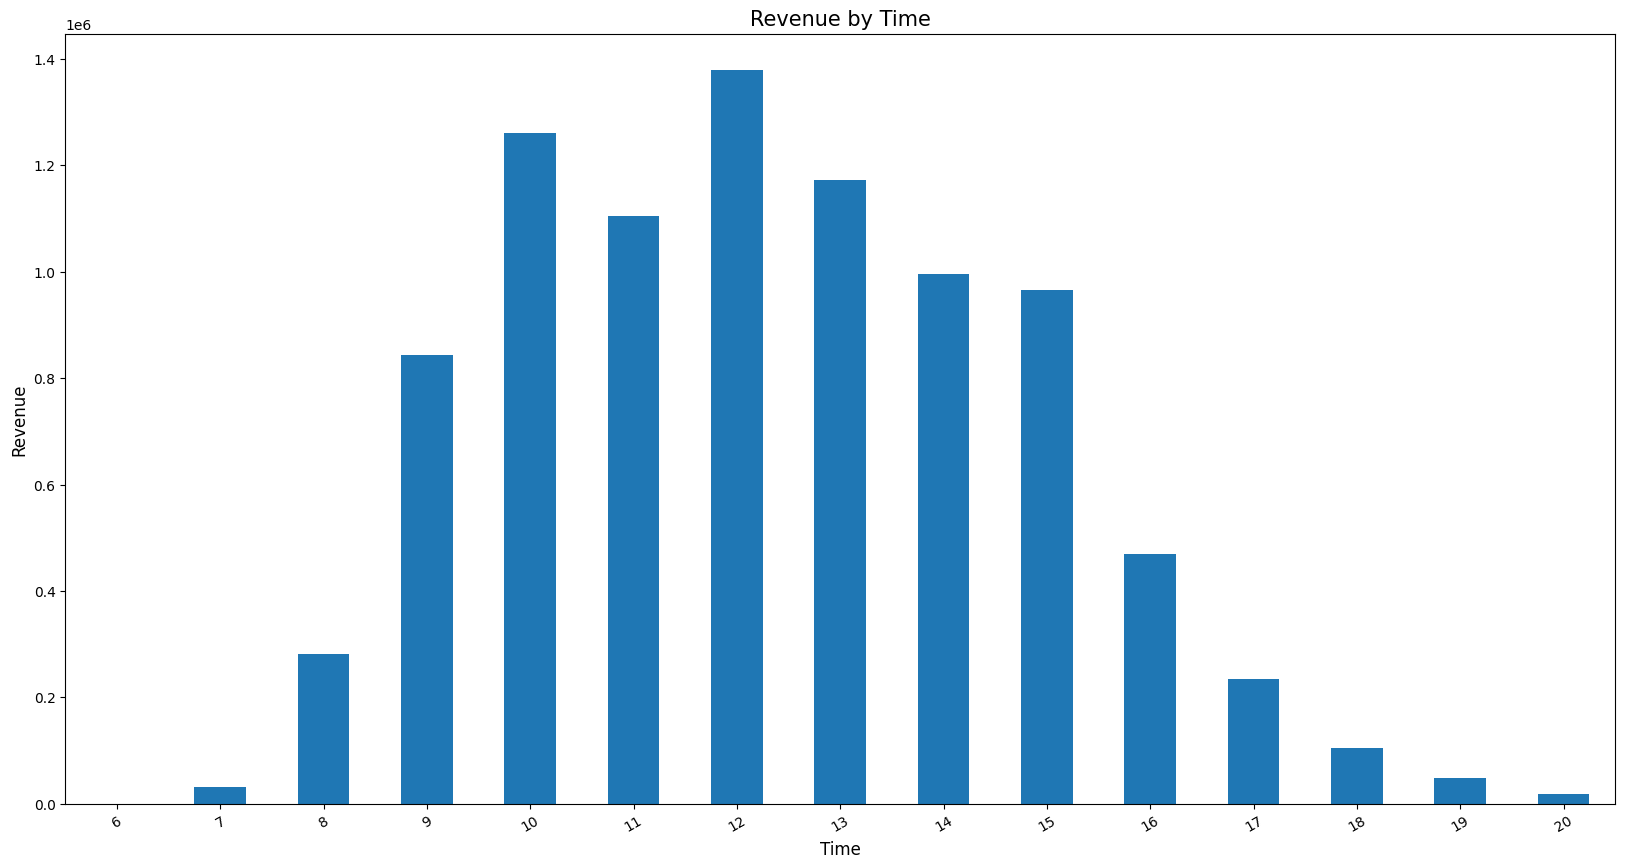

In [94]:
plot_bar(rev_by_time, 'Time', 'Revenue', 'Revenue by Time')

### 데이터로부터 인사이트

* 전체 매출의 82%가 Uk
* 매출은 꾸준히 증가하는 추세(11년 12월 데이터는 9월까지만포함)
* 토요일은 영업을 하지않음
* 새벽6시 오픈 오후 9시에 마감 예상
* 일주일 중 목요일 까지는 성장세를 보이고 이후 하락

### 문제
* 판매제품 top 10
* 단 기준은 Quantity

In [101]:
top10 = retail1.groupby('StockCode')['Quantity'].sum().sort_values(ascending = False)[: 10]

top10

StockCode
23843     80995
23166     77916
84077     54415
22197     49183
85099B    46181
85123A    36782
84879     35362
21212     33693
23084     27202
22492     26076
Name: Quantity, dtype: int64